# 1

The predictions will be identical, regardless of the units of $x$.  For that to happen, eg $P(y=1|x)$ to be the same whether $x$ is measured in miles or kilometers, the term $-3.74x$ when $x$ is in miles must have the same value when units are changed.  The $\beta_1$ will change to compensate.  The conversion factor is 1.61 km to 1 mile.  As $x$ values decrease by a factor of $\frac{1}{1.61}$, the $\beta_1$ will increase by a factor of $1.61$

Thus, Sammie will get $-3.74*1.61/1 = -6.02$

# 2

(a) $10\%$ or 0.1


(b)$1\%$  (since $(1/10)^2$)

(c)  $(1/10)^{100}$

(d) If we want 100 samples nearby, then we need 1000 samples for $p=1$. 10000 samples for $p=2$, and $100*10^p$ in general.  the number of samples needed grows exponentially, so for nearest neighbor methods, vanishingly few samples will be nearby

(e) for $p=1$,  solve $\frac{length}{1}=0.1$

for $p = 2$, solve $\frac{length^2}{1^2}=0.1$, so $length = \sqrt{0.1} = 0.316$

for $p = 100$, solve $\frac{length^{100}}{1^{100}}=0.1$, so $length = \sqrt[100]{0.1} = 0.977$

for large $p$, the sides need to be almost the entire interval $[0,1]$ to contain $10\%$ of the samples

# 3

(a) $ Prob(y= \text{receive an A} | X_1=40, X_2 = 3.5) = \frac{ e^{-6 + 0.05(40) + 1(3.5)} }{1+ e^{-6 + 0.05(40) + 1(3.5)}} = \frac{0.607}{1.607} = .38$

(b) $0.5 = Prob(y= \text{receive an A} | X_1, X_2 = 3.5) = \frac{ e^{-6 + 0.05X_1 + 1(3.5)} }{1+ e^{-6 + 0.05X_1 + 1(3.5)}} $

$1 = e^{-6 + 0.05X_1 + 1(3.5)}$

$0 = -6 + 0.05X_1 + 1(3.5)$

$X_1 = \frac{2.5}{0.05} = 50$

# 4

1-nearest neighbor has no training loss (since if we try predicting the $y$ for a sample in the training set, it will be its own nearest neighbor)

Thus, the test set must have had an error of $36\%$, which is worse than logistic regression.  So we should prefer logistic regression



# 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# 5.A Scatterplot

In [2]:
# load training set
ytrain = []
xtrain = []
with open('HW2train.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',',lineterminator='\n')
    for row in reader:
        if len(row)==2:
            ytrain.append( int(row[0]) )
            xtrain.append( float(row[1]) )
            
xtrain = np.array(xtrain).reshape(-1, 1)
ytrain = np.array(ytrain)
            
# #Verify values loaded correctly
# print(ytrain)
# print(xtrain)

In [3]:
# load testing set
ytest = []
xtest = []
with open('HW2test.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',',lineterminator='\n')
    for row in reader:
        if len(row)==2:
            ytest.append( int(row[0]) )
            xtest.append( float(row[1]) )
            
xtest = np.array(xtest).reshape(-1, 1)
ytest = np.array(ytest)           
# #Verify values loaded correctly
# print(ytest)
# print(xtest)

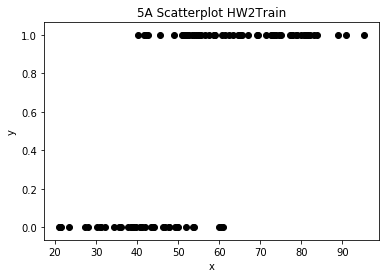

In [4]:
plt.scatter(xtrain, ytrain,  color='black')
plt.title('5A Scatterplot HW2Train')
# plt.scatter(x0test, np.zeros((10)),  color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('HW2trainscatter.png',dpi=300,bbox_inches='tight')

# 5.B Logistic regression

5.B(1) Fit and report coefficients

In [5]:
clf = LogisticRegression(penalty='none', fit_intercept=True,solver='lbfgs').fit(xtrain, ytrain)

In [6]:
print('beta0 = %.3f \t beta1 = %.3f'%(clf.intercept_  , clf.coef_) )

beta0 = -9.06 	 beta1 = 0.18


5.B.(2) Training Accuracy

In [7]:
clf.score(xtrain, ytrain)

0.86

5.B.(3) Plot predicted function

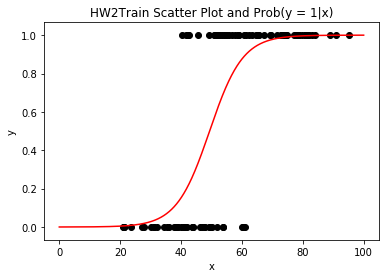

In [8]:
xplot = np.linspace(0,100,1000).reshape(-1,1)
yplot = clf.predict_proba(xplot)
yplot = yplot[:,1]
plt.plot(xplot,yplot,color='red')
plt.scatter(xtrain, ytrain,  color='black')
plt.title('HW2Train Scatter Plot and Prob(y = 1|x)')

# plt.scatter(x0test, np.zeros((10)),  color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('HW2trainscatterPred.png',dpi=300,bbox_inches='tight')

5.B.(4) Plot testing data and Classifier

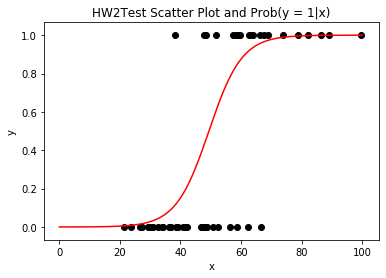

In [9]:
plt.plot(xplot,yplot,color='red')
plt.scatter(xtest, ytest,  color='black')
plt.title('HW2Test Scatter Plot and Prob(y = 1|x)')

# plt.scatter(x0test, np.zeros((10)),  color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('5B4HW2testscatterPred.png',dpi=300,bbox_inches='tight')

5.B.(5) Test Accuracy

In [10]:
clf.score(xtest, ytest)

0.82

# 5.C Knn

In [11]:
neigh = KNeighborsClassifier(n_neighbors=1,weights='uniform',algorithm='auto')
neigh.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Working on k=1
	The training accuracy is 1.000
	The testing accuracy is 0.700
Working on k=3
	The training accuracy is 0.900
	The testing accuracy is 0.800
Working on k=9
	The training accuracy is 0.860
	The testing accuracy is 0.820


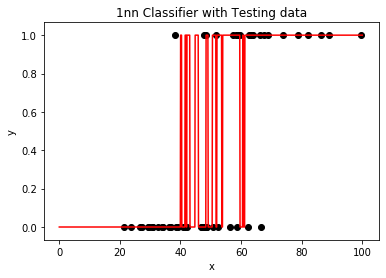

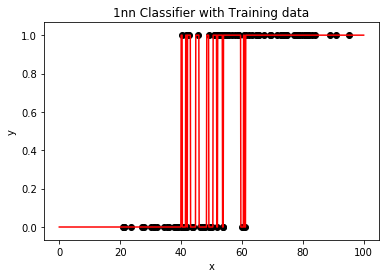

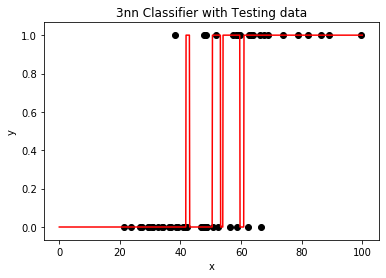

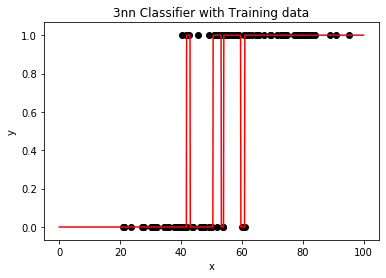

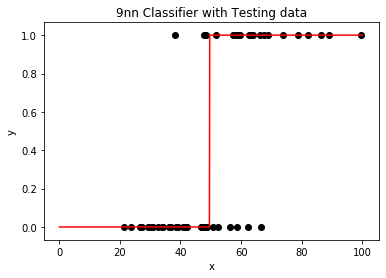

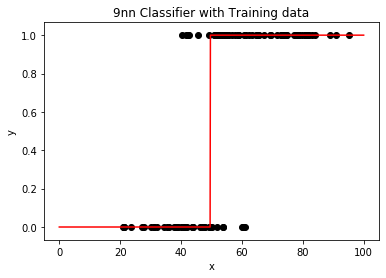

In [17]:
for k in [1,3,9]:
    print('Working on k=%i'%(k))
    neigh = KNeighborsClassifier(n_neighbors=k,weights='uniform',algorithm='auto')
    neigh.fit(xtrain, ytrain)
    print('\tThe training accuracy is %.3f'%(neigh.score(xtrain,ytrain)))
    print('\tThe testing accuracy is %.3f'%(neigh.score(xtest,ytest)))
    yplot = neigh.predict(xplot)
    plt.figure()
    plt.plot(xplot,yplot,color='red')
    plt.scatter(xtest, ytest,  color='black')
    plt.title('%inn Classifier with Testing data'%(k))

    # plt.scatter(x0test, np.zeros((10)),  color='red')
    plt.xlabel('x')
    plt.ylabel('y')

    plt.figure()
    plt.plot(xplot,yplot,color='red')
    plt.scatter(xtrain, ytrain,  color='black')
    plt.title('%inn Classifier with Training data'%(k))

    # plt.scatter(x0test, np.zeros((10)),  color='red')
    plt.xlabel('x')
    plt.ylabel('y')

# 5.C.(2) knn Training Accuracy as a function of k

In [13]:
print([i for i in range(1,16,2)])

[1, 3, 5, 7, 9, 11, 13, 15]


Working on k=1
	The training accuracy is 1.000
	The testing accuracy is 0.700
Working on k=3
	The training accuracy is 0.900
	The testing accuracy is 0.800
Working on k=5
	The training accuracy is 0.910
	The testing accuracy is 0.800
Working on k=7
	The training accuracy is 0.860
	The testing accuracy is 0.820
Working on k=9
	The training accuracy is 0.860
	The testing accuracy is 0.820
Working on k=11
	The training accuracy is 0.870
	The testing accuracy is 0.820
Working on k=13
	The training accuracy is 0.860
	The testing accuracy is 0.820
Working on k=15
	The training accuracy is 0.860
	The testing accuracy is 0.820


Text(0, 0.5, 'accuracy')

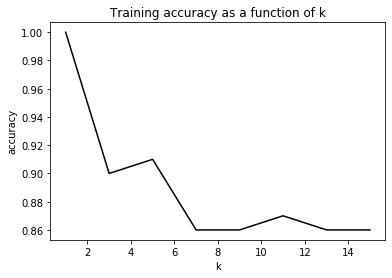

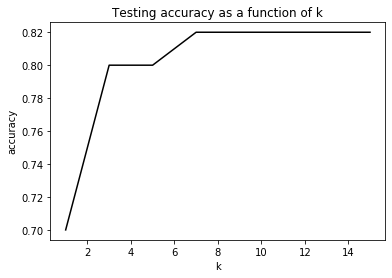

In [16]:
trainacc = []
testacc = []
for k in range(1,16,2):
    print('Working on k=%i'%(k))
    neigh = KNeighborsClassifier(n_neighbors=k,weights='uniform',algorithm='auto')
    neigh.fit(xtrain, ytrain)
    trainacc.append( neigh.score(xtrain,ytrain) )
    testacc.append( neigh.score(xtest,ytest) )
    print('\tThe training accuracy is %.3f'%(neigh.score(xtrain,ytrain)))
    print('\tThe testing accuracy is %.3f'%(neigh.score(xtest,ytest)))

    

plt.figure()

plt.plot(range(1,16,2),trainacc,color='black')
plt.title('Training accuracy as a function of k')
plt.xlabel('k')
plt.ylabel('accuracy')

plt.figure()

plt.plot(range(1,16,2),testacc,color='black')
plt.title('Testing accuracy as a function of k')
plt.xlabel('k')
plt.ylabel('accuracy')


# 5.D.

For small $k$, the function is very erratic in the region where the $y=0$ and $y=1$ points overlap.  We can see it is changing the prediction according to every single training point. That is very clearly overfitting when $k=1$.   As we increase $k$, there are fewer steps, and by $k=9$ there is just a single step.  The $y=0$ points seem more concentrated at smaller $x$ values than the $y=1$ points, and all the classifiers seem to capture that, so there is no clear evidence of under-fitting.

The best $k$-NN methods, such as with $k=9$, and the logistic regression appear to have the same training and testing accuracies.  If we look at the corresponding prediction functions, it seems the logistic classifier switches from predicting $0$ to $1$ around the same location the $9$-NN method does.  Consequently, even though the methods approach classification very differently, they seem to be learning the same function in the end.